In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [2]:
x,y = make_classification(n_features = 5, n_redundant=0, n_informative=5, n_clusters_per_class=1)

In [4]:
df = pd.DataFrame(x, columns=["col 1", "col 2", "col 3", "col 4","col 5"])
df["target"] = y
print(df.shape)
df.head()

(100, 6)


,col 1,col 2,col 3,col 4,col 5,target
0,1.883534,2.456086,-1.386561,2.074534,1.271931,1
1,2.372393,0.419235,-0.124720,0.998977,-0.062553,1
2,-1.112096,-0.290907,-1.050624,-1.555773,-2.091095,0
3,-0.066476,0.571830,-1.222682,-0.691356,-0.266265,1
4,-2.714024,0.469656,0.415609,-2.106861,-2.045649,0


In [6]:
# function for row sampling

def row_sample(df,percent):
    return df.sample(int(df.shape[0]*percent),replace=True)

In [15]:
# function for column sampling

def column_sample(df,percent):
    import random
    cols = random.sample(df.columns.tolist(),int((df.shape[1]-1)*percent))
    new_df = df[cols]
    new_df["target"] = df["target"]
    return new_df






In [19]:
# function for combine sampling

def combine_sampling(df,row_percent,column_percent):
    new_df = row_sample(df,row_percent)
    combine_df = column_sample(new_df,column_percent)
    return combine_df
    

In [23]:
df1 = combine_sampling(df,0.5,0.5)
df2 = combine_sampling(df,0.5,0.5)
df3 = combine_sampling(df,0.5,0.5)

C:\Users\tanisadhwani\AppData\Local\Temp\ipykernel_31844\3065100489.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["target"] = df["target"]
C:\Users\tanisadhwani\AppData\Local\Temp\ipykernel_31844\3065100489.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["target"] = df["target"]
C:\Users\tanisadhwani\AppData\Local\Temp\ipykernel_31844\3065100489.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [26]:
print(df1.columns)
print(df2.columns)
print(df3.columns)

Index(['col 2', 'col 4', 'target'], dtype='object')
Index(['col 2', 'col 5', 'target'], dtype='object')
Index(['col 3', 'col 1', 'target'], dtype='object')


In [27]:
from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = DecisionTreeClassifier(random_state=42)
clf3 = DecisionTreeClassifier(random_state=42)

In [28]:
clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [29]:
from sklearn.tree import plot_tree

[Text(0.5, 0.9, 'x[1] <= 0.0\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.2, 0.7, 'x[1] <= -0.701\ngini = 0.287\nsamples = 23\nvalue = [19, 4]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 14\nvalue = [14, 0]'),
 Text(0.3, 0.5, 'x[0] <= -0.399\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.8, 0.7, 'x[0] <= -0.48\ngini = 0.252\nsamples = 27\nvalue = [4, 23]'),
 Text(0.65, 0.8, '  False'),
 Text(0.7, 0.5, 'x[0] <= -1.372\ngini = 0.49\nsamples = 7\nvalue = [4, 3]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.8, 0.3, 'x[0] <= -1.14\ngini = 0.48\nsamples = 5\nvalue = [2, 3]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.9, 0.5, 'gini = 0.0\nsamples = 20\nvalue = [0, 20]')]

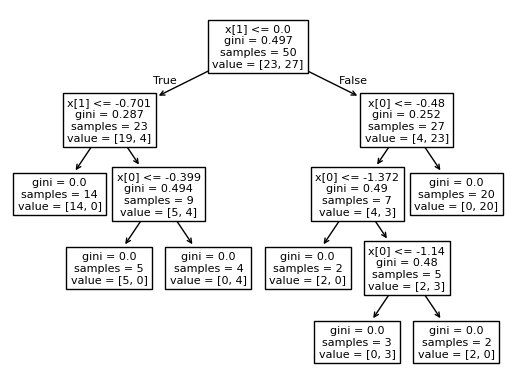

In [30]:
plot_tree(clf1)

[Text(0.4444444444444444, 0.9, 'x[1] <= -0.288\ngini = 0.493\nsamples = 50\nvalue = [28.0, 22.0]'),
 Text(0.2222222222222222, 0.7, 'x[0] <= 1.435\ngini = 0.142\nsamples = 26\nvalue = [24, 2]'),
 Text(0.3333333333333333, 0.8, 'True  '),
 Text(0.1111111111111111, 0.5, 'gini = 0.0\nsamples = 24\nvalue = [24, 0]'),
 Text(0.3333333333333333, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6666666666666666, 0.7, 'x[0] <= -1.449\ngini = 0.278\nsamples = 24\nvalue = [4, 20]'),
 Text(0.5555555555555556, 0.8, '  False'),
 Text(0.5555555555555556, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.5, 'x[1] <= 0.067\ngini = 0.091\nsamples = 21\nvalue = [1, 20]'),
 Text(0.6666666666666666, 0.3, 'x[1] <= 0.028\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(0.5555555555555556, 0.1, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.7777777777777778, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8888888888888888, 0.3, 'gini = 0.0\nsamples = 15\nvalue

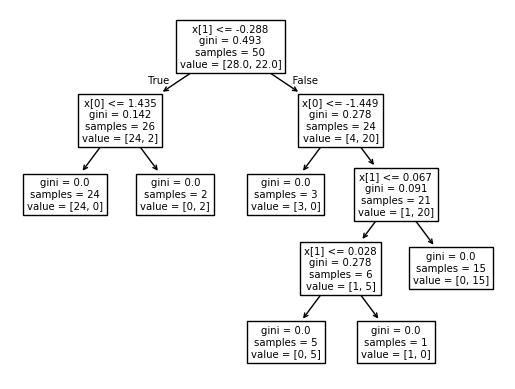

In [31]:
plot_tree(clf2)

[Text(0.4444444444444444, 0.875, 'x[1] <= -0.117\ngini = 0.499\nsamples = 50\nvalue = [24, 26]'),
 Text(0.2222222222222222, 0.625, 'x[0] <= -0.656\ngini = 0.087\nsamples = 22\nvalue = [21, 1]'),
 Text(0.3333333333333333, 0.75, 'True  '),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 21\nvalue = [21, 0]'),
 Text(0.6666666666666666, 0.625, 'x[0] <= 0.634\ngini = 0.191\nsamples = 28\nvalue = [3, 25]'),
 Text(0.5555555555555556, 0.75, '  False'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(0.7777777777777778, 0.375, 'x[1] <= 1.464\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

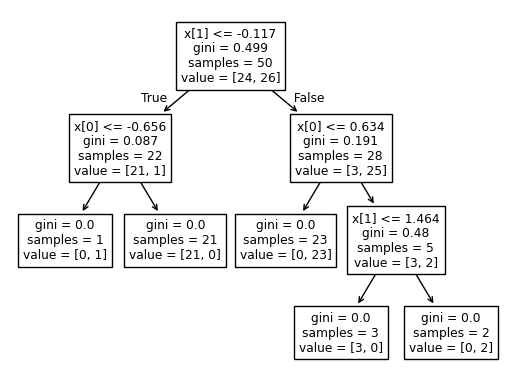

In [32]:
plot_tree(clf3)